In [4]:
import pandas as pd



In [7]:
s= pd.Series([10,20,30,40,50,60,70])
print(s)


0    10
1    20
2    30
3    40
4    50
5    60
6    70
dtype: int64


In [10]:
s= pd.Series([10,20,30,40,50,60,70],index = ['a','b','c','d','e','f','g'])
print(s)


a    10
b    20
c    30
d    40
e    50
f    60
g    70
dtype: int64


In [15]:
#creating a dataframe
data = {
    'Name' : ['Alice','Bob','Charlie','David'],
    'Age' : [25,30,35,40],
    'city' :['Newyork','Los Angels','Chicago','Houston']
}
df = pd.DataFrame(data)
print(df)

      Name  Age        city
0    Alice   25     Newyork
1      Bob   30  Los Angels
2  Charlie   35     Chicago
3    David   40     Houston


In [19]:
#reading and writing data
df = pd.read_csv('../assets/employee_data.csv')

In [20]:
#displa first 5 rows
df.head()

,Age,Name,Salary,City
0,25,Alice,50000,New York
1,30,Bob,60000,Los Angeles
2,35,Charlie,70000,Chicago
3,40,David,80000,Houston
4,28,Eva,55000,San Francisco


In [21]:
df.head(3)

,Age,Name,Salary,City
0,25,Alice,50000,New York
1,30,Bob,60000,Los Angeles
2,35,Charlie,70000,Chicago


In [22]:
#last 5 rows
df.tail()

,Age,Name,Salary,City
3,40,David,80000,Houston
4,28,Eva,55000,San Francisco
5,32,Frank,65000,Seattle
6,38,Grace,72000,Boston
7,45,Henry,85000,Miami


In [23]:
#summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     8 non-null      int64 
 1   Name    8 non-null      object
 2   Salary  8 non-null      int64 
 3   City    8 non-null      object
dtypes: int64(2), object(2)
memory usage: 388.0+ bytes


In [24]:
#description statistics
df.describe()

,Age,Salary
count,8.000000,8.000000
mean,34.125000,67125.000000
std,6.664136,12028.982857
min,25.000000,50000.000000
25%,29.500000,58750.000000
50%,33.500000,67500.000000
75%,38.500000,74000.000000
max,45.000000,85000.000000


In [28]:
#select a column
ages = df['Age']
ages

0    25
1    30
2    35
3    40
4    28
5    32
6    38
7    45
Name: Age, dtype: int64

In [29]:
#select multiple columns
subset = df[['Name','Age']]
subset

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35
3,David,40
4,Eva,28
5,Frank,32
6,Grace,38
7,Henry,45


In [30]:
# select rows by index
first_two_rows = df[0:2]
first_two_rows

,Age,Name,Salary,City
0,25,Alice,50000,New York
1,30,Bob,60000,Los Angeles


In [32]:
filtered_df = df[df['Age']>30]
filtered_df

,Age,Name,Salary,City
2,35,Charlie,70000,Chicago
3,40,David,80000,Houston
5,32,Frank,65000,Seattle
6,38,Grace,72000,Boston
7,45,Henry,85000,Miami


In [34]:
#deleting a column
df.drop('Name',axis=1,inplace = True)
df

,Age,Salary,City
0,25,50000,New York
1,30,60000,Los Angeles
2,35,70000,Chicago
3,40,80000,Houston
4,28,55000,San Francisco
5,32,65000,Seattle
6,38,72000,Boston
7,45,85000,Miami


In [36]:
#deleting a row
df.drop(2,axis=0,inplace = True)
df

,Age,Salary,City
0,25,50000,New York
1,30,60000,Los Angeles
3,40,80000,Houston
4,28,55000,San Francisco
5,32,65000,Seattle
6,38,72000,Boston
7,45,85000,Miami


In [37]:
#missing data
df.isnull().sum()

Age       0
Salary    0
City      0
dtype: int64

In [39]:
#dropping missingdata
df.dropna(inplace= True)

In [40]:
#groupind data
grouped = df.groupby('City')['Age'].mean()
grouped

City
Boston           38.0
Houston          40.0
Los Angeles      30.0
Miami            45.0
New York         25.0
San Francisco    28.0
Seattle          32.0
Name: Age, dtype: float64

In [41]:
df = pd.read_csv('../assets/sales_data.csv')

In [42]:
df


,Date,Product,Units Sold,Price,Total Revenue
0,2024-01-01,Apples,50,1.5,75.0
1,2024-01-02,Bananas,30,0.8,24.0
2,2024-01-03,Oranges,40,1.0,40.0
3,2024-01-04,Grapes,20,2.5,50.0
4,2024-01-05,Apples,70,1.5,105.0
5,2024-01-06,Bananas,45,0.8,36.0
6,2024-01-07,Oranges,60,1.0,60.0
7,2024-01-08,Grapes,25,2.5,62.5


In [43]:
df.head()


,Date,Product,Units Sold,Price,Total Revenue
0,2024-01-01,Apples,50,1.5,75.0
1,2024-01-02,Bananas,30,0.8,24.0
2,2024-01-03,Oranges,40,1.0,40.0
3,2024-01-04,Grapes,20,2.5,50.0
4,2024-01-05,Apples,70,1.5,105.0


In [44]:
grouped = df.groupby('Product')['Units Sold'].sum()
grouped

Product
Apples     120
Bananas     75
Grapes      45
Oranges    100
Name: Units Sold, dtype: int64

In [55]:
grouped = df.groupby('Product')['Total Revenue'].sum()
grouped

Product
Apples     180.0
Bananas     60.0
Grapes     112.5
Oranges    100.0
Name: Total Revenue, dtype: float64

In [54]:
maxd = df.groupby('Product')['Total Revenue'].idxmax()
maxd

Product
Apples     4
Bananas    5
Grapes     7
Oranges    6
Name: Total Revenue, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

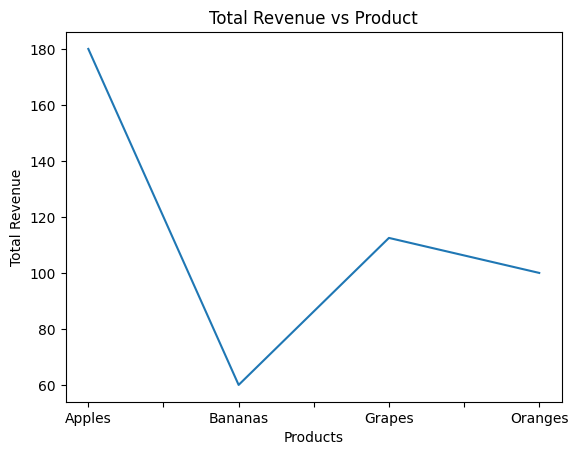

In [61]:
import matplotlib.pyplot as plt
grouped.plot()
plt.title('Total Revenue vs Product')
plt.xlabel('Products')
plt.ylabel('Total Revenue')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

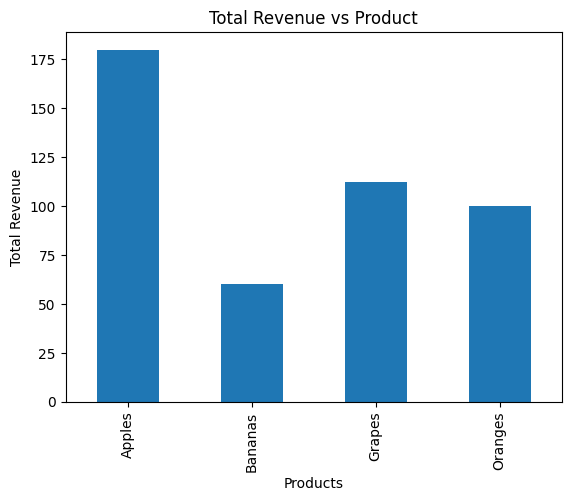

In [64]:
#bar

import matplotlib.pyplot as plt
grouped.plot(kind = "bar")
plt.title('Total Revenue vs Product')
plt.xlabel('Products')
plt.ylabel('Total Revenue')
plt.show
